In [ ]:
the aim for this project is to provide an estimator students 

In [177]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [178]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('Student_Performance.csv')

In [179]:
dataset.count()


Hours Studied                       10000
Previous Scores                     10000
Extracurricular Activities          10000
Sleep Hours                         10000
Sample Question Papers Practiced    10000
Performance Index                   10000
dtype: int64

In [180]:
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [181]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [182]:
dataset.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [183]:
def Yes_No_encoding(data):
    return 1 if data == 'Yes' else 0

dataset['Extracurricular Activities'] = dataset['Extracurricular Activities'].apply(Yes_No_encoding)
dataset = pd.DataFrame(dataset)

In [184]:
#Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index

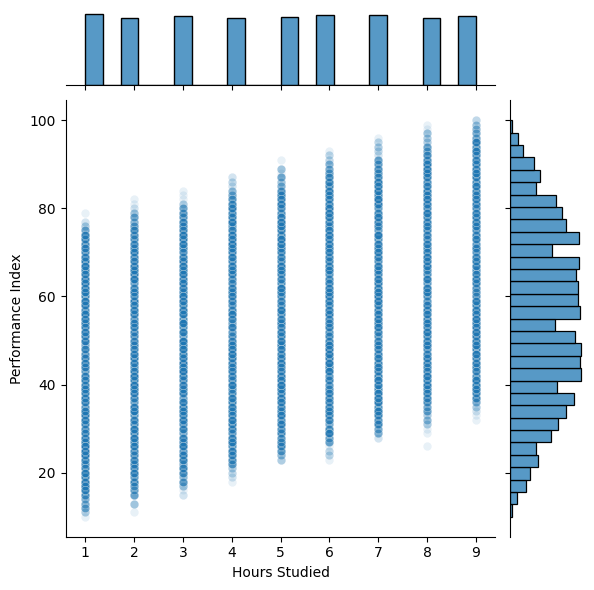

In [185]:
sns.jointplot(x='Hours Studied' , y='Performance Index', data=dataset,alpha=0.1)

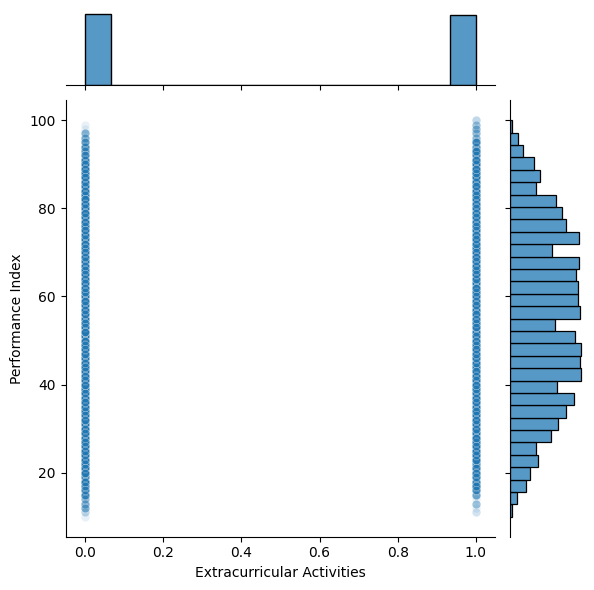

In [186]:
sns.jointplot(x='Extracurricular Activities' , y='Performance Index', data=dataset,alpha=0.1)

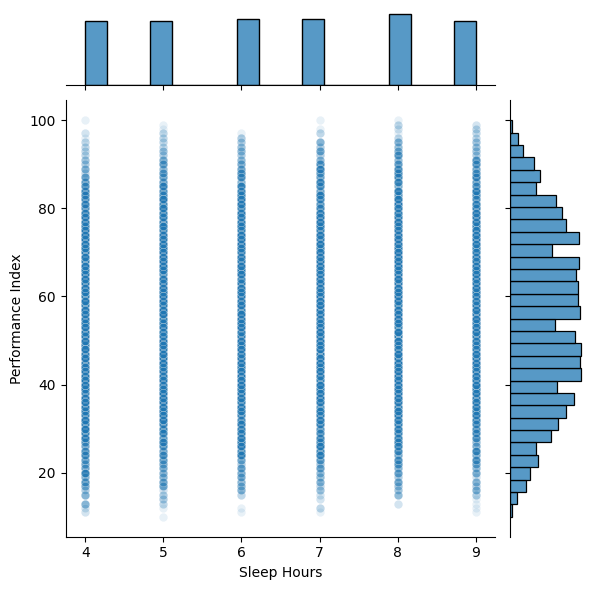

In [187]:
sns.jointplot(x='Sleep Hours' , y='Performance Index', data=dataset,alpha=0.1)

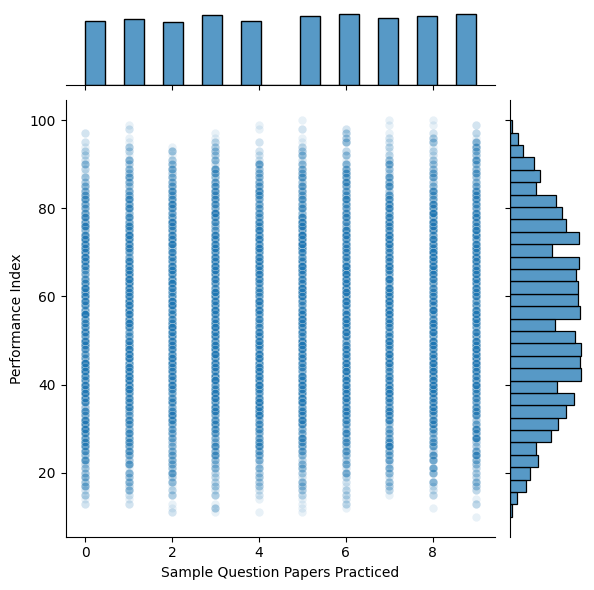

In [188]:
sns.jointplot(x='Sample Question Papers Practiced' , y='Performance Index', data=dataset,alpha=0.1)

In [189]:

scaler = StandardScaler()
normalized_data = scaler.fit_transform(dataset)

X, Y = normalized_data[:, :-1], normalized_data[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [214]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import GridSearchCV as CV
import joblib
model = LR()
param_grid = {'fit_intercept':[True,False],'copy_X':[True, False], 'positive':[True,False]}

CV_model = CV(model, param_grid, cv=5)
CV_model.fit(x_train, y_train)

print('best parameters: ' , CV_model.best_params_,'\n' ,
      'best estimator: ',CV_model.best_estimator_,'\n',
      'parameters: ',CV_model.best_estimator_.coef_,'\n',
      'best score',CV_model.best_score_,'\n',)

joblib.dump(CV_model.best_estimator_, 'student_performance_estimator.pkl')



best parameters:  {'copy_X': True, 'fit_intercept': False, 'positive': True} 
 best estimator:  LinearRegression(fit_intercept=False, positive=True) 
 parameters:  [0.3843578  0.91972988 0.01731362 0.04208878 0.02802277] 
 best score 0.9888652480049819 



['student_performance_estimator.pkl']